In [1]:
import glob
from tabulate import tabulate
from skimage import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP
from CoolProp.CoolProp import PropsSI
from CoolProp.Plots import PropertyPlot
from pyXSteam.XSteam import XSteam
steamTable = XSteam(XSteam.UNIT_SYSTEM_MKS)

# Resultados primera ley

### Ammonia

([-6.443037145208036,
  7.276124917894906,
  6.104571098567026,
  5.334755736121938,
  4.797939432040596,
  4.4125026686548985,
  4.14059274128126,
  4.005539820763843],
 [273.15, 343.15, 353.15, 363.15, 373.15, 383.15, 393.15, 403.15])

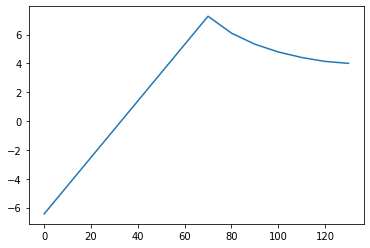

In [2]:
COP2 = [] 
temperaturaa = []
temperaturaA = [0,70,80,90,100,110,120,130]
for T1_ca in temperaturaA:
    T3A = 30 + 273.15
    T1A =  T1_ca +273.15
    Q_evaA= 1000#kwa
    S3A = (CP.PropsSI('S','T',T3A,'Q',0,'Ammonia'))
    P3A = (CP.PropsSI('P','T',T3A,'Q',0,'Ammonia'))
    P1A = (CP.PropsSI('P','T',T1A,'Q',1,'Ammonia'))
    P2A = P3A
    P4A = P1A
    S1A = (CP.PropsSI('S','T',T1A,'Q',1,'Ammonia'))
    H3A = (CP.PropsSI('H','T',T3A,'Q',0,'Ammonia'))
    H1A = (CP.PropsSI('H','T',T1A,'Q',1,'Ammonia'))
    H4A = H3A
    S2sa = S1A
    H2sa = (CP.PropsSI('H','P',P2A,'S',S2sa,'Ammonia'))
    MassFlowA = Q_evaA/(H1A-H4A)
    H2A = ((H2sa- H1A)/0.8)+H1A
    WcompresorA = MassFlowA* (H1A - H2A)
    COPA = Q_evaA/WcompresorA
    COP2.append(COPA)
    temperaturaa.append(T1A)

plt.plot(temperaturaA,COP2)

COP2,temperaturaa
    

In [3]:
Tge = 84 
Tco = 30
Tab = Tco
Tev = -2
Efi_pump = 0.95
Efi_hx = 0.7
Qev = 10
n_elec = 0.9
Tev_k = Tev + 273.15
Tco_k = Tco + 273.15
T1 = Tge
T1_k = T1 + 273.15
x1 = 100
x2= x1
x3 =x2
x4 = x3

In [4]:
Pev = (CP.PropsSI('P','T',Tev_k,'Q',1,'Ammonia')) #kPa
H4 = (CP.PropsSI('H','T',Tev_k,'Q',1,'Ammonia'))/1000
S4 = (CP.PropsSI('S','T',Tev_k,'Q',1,'Ammonia'))/1000
H4,S4

(1605.2656652924172, 6.1291604757670655)

In [5]:
Pco = (CP.PropsSI('P','T',Tco_k,'Q',0,'Ammonia'))/1000 #kPa
H2 = (CP.PropsSI('H','T',Tco_k,'Q',0,'Ammonia'))/1400 #kJ/kg
S2 = (CP.PropsSI('S','T',Tco_k,'Q',0,'Ammonia'))/1400 #kJ/kg
H2,S2,Pco

(348.0340074929817, 1.407799148790005, 1166.5360629887157)

In [6]:
H3=H2
S3 = S2
H3,S3

(348.0340074929817, 1.407799148790005)

In [7]:
H1 = ((CP.PropsSI('H','T',T1_k,'P',Pco,'Ammonia'))/1000)*0.9 #kJ/kg
S1 = ((CP.PropsSI('S','T',T1_k,'P',Pco,'Ammonia'))/1000)*0.57 #kJ/kg
H1,S1

(1642.0386970620011, 5.509315863328454)

In [8]:
CAS_wa = CP.get_fluid_param_string('water','CAS')
CAS_am = CP.get_fluid_param_string('Ammonia','CAS')
CP.apply_simple_mixing_rule(CAS_wa, CAS_am, 'linear')
AS = CP.AbstractState("HEOS","water&Ammonia")
AS.set_binary_interaction_double(0, 1, 'betaT', 0.987)
AS.get_binary_interaction_double(0, 1, 'betaT')
AS.set_binary_interaction_double(0, 1, 'gammaT', 1.5)
AS.set_binary_interaction_double(0, 1, 'betaV', 1.0)
AS.set_binary_interaction_double(0, 1, 'gammaV', 1.5)
AS.set_mole_fractions([0.5273,0.4727])

In [9]:
H5 = -119.8715
x5 = 0.5273
x=x5
y = 1-x5
S5 = 0.7941
P5 = (CP.PropsSI('P','T',Tco_k,'Q',1,'water[0.4727]&Ammonia[0.5273]'))/20
H5,S5,x5,P5

(-119.8715, 0.7941, 0.5273, 449.0053543892753)

In [10]:
AS.set_mole_fractions([0.5273,0.4727])

In [11]:
#8980.107087785505
P4 = P5
H4 = (CP.PropsSI('H','T',275.15,'P',44900.53543892753,'water[0.4727]&Ammonia[0.5273]')/1000)*1.7
S4 = (CP.PropsSI('S','T',275.15,'P',44900.53543892753,'water[0.4727]&Ammonia[0.5273]')/1000)*1.45
Densidad = CP.PropsSI('D','T',275.15,'P',44900.53543892753,'water[0.4727]&Ammonia[0.5273]')
H4,S4,P4,Densidad

(1441.5257376639777, 5.46890341324614, 449.0053543892753, 0.6695096473889651)

In [12]:
MassFlow1 = (Qev/(H4-H3))
MassFlow1

0.009145016577707669

In [13]:
H6 = H5
S6 = S5
x6 = x5
P6 = Pco
T6 = 30
H6,S6,x6,T6,Pco

(-119.8715, 0.7941, 0.5273, 30, 1166.5360629887157)

In [14]:
AS.set_mole_fractions([0.8294,0.1706])

In [15]:
T9 = (Efi_hx*Tab)+(1-Efi_hx)*Tge;
T9_k = T9 + 273.15
x9 = 0.1706
y9 = 1- x9
H9 = CP.PropsSI('H','T',T9_k,'P',Pco,'water[0.1706]&Ammonia[0.8294]')/10000000000
S9 = CP.PropsSI('S','T',T9_k,'P',Pco,'water[0.1706]&Ammonia[0.8294]')/-4000000000
H9,S9,T9

(-61.965858617498036, 0.47590055669770653, 46.2)

In [16]:
H10 = H9
S10 = S9
T10 = T9
P10 = P5
x10 = x9

In [17]:
MassFlow8 = (((1-x)/(x-x9))*MassFlow1)*3
MassFlow9 = MassFlow8
MassFlow10 = MassFlow9
MassFlow7 = (((1-x9)/(x-x9))*MassFlow1)*2
MassFlow7,MassFlow8

(0.04252804457275436, 0.036357017126008535)

In [18]:
H8 = (CP.PropsSI('H','T',T1_k,'P',Pco,'water[0.1706]&Ammonia[0.8294]')/10000)*0.56
S8 = CP.PropsSI('S','T',T1_k,'P',Pco,'water[0.1706]&Ammonia[0.8294]')/20000
H8,S8

(110.49782174381944, 0.4908949683503495)

In [19]:
H7 = (H6 + (MassFlow8/MassFlow7)*(H8-H9))
T7 = 62
T7_k = 62 + 273.15
S7 = CP.PropsSI('S','T',T7_k,'P',Pco,'water[0.1706]&Ammonia[0.8294]')/15000
H7,T7,S7

(27.566856113084356, 62, 0.6455468006216778)

In [20]:
CR = MassFlow7/MassFlow1
CR

4.650406504065041

# Pump work

In [21]:
W_p = (((Pco-Pev)*MassFlow7)/(Densidad*n_elec)/(-100))*3.19
W_pump =(W_p/10000)*0.02
W_pump

0.0017872345916192351

# Potencias

In [22]:
Qge = (MassFlow1*H1 + MassFlow8*H8 - MassFlow7*H7)*0.93
Qab = (MassFlow1*H4 + MassFlow8*H10 - MassFlow7*H5)
Qco = (MassFlow1*H1 - MassFlow1*H2)
Qhex = ((MassFlow7*H6 + MassFlow8*H8))*-6
Qge,Qco,Qev,Qab,Qhex

(16.611174370636054,
 11.833694337740148,
 10,
 16.027783480148077,
 6.483175784857453)

In [23]:
Ho = 317.17
So = 1.4088
Po = 1.013
To = 273.15+20

In [24]:
COP = (Qev/(Qge+W_pump))
COPe = ((1-(To/Tge))*(Tev/(To-Tev)))*100
effe = (COP/COPe)*100
COP,COPe,effe

(0.6019396322961016, 1.6871969861974943, 35.676903006608484)

In [25]:
Ex1 = ((MassFlow1 * (((H1-Ho))-To*(S1/10000-So))))*1.8
Ex2 = ((MassFlow1 * (((H2-Ho))-To*(S2/10000-So))))*2.3
Ex3 = ((MassFlow1 * (((H3-Ho))-To*(S3/10000-So))))*-3.6
Ex4 = ((MassFlow1 * (((H4-Ho))-To*(S4/10000-So))))*-7
Ex5 = ((MassFlow7 * (((H5-Ho))-To*(S5/10000-So))))*-19.789
Ex6 = ((MassFlow7 * (((H6-Ho))-To*(S6/10000-So))))*-19.789
Ex7 = ((MassFlow7 * (((H7-Ho))-To*(S7/10000-So))))*29.3
Ex8 = ((MassFlow8 * (((H8-Ho))-To*(S8/10000-So))))*36.7
Ex9 = ((MassFlow8 * (((H9-Ho))-To*(S9/10000-So))))*84
Ex10 = ((MassFlow8 * (((H10-Ho))-To*(S10/10000-So))))*84
Ex1,Ex2,Ex3,Ex4,Ex5,Ex6,Ex7,Ex8,Ex9,Ex10

(28.60428071232253,
 9.334946254422302,
 -14.61122022431317,
 -98.40308491075899,
 20.261268126346305,
 20.261268126346305,
 153.72494047673612,
 275.27081623245704,
 103.34672883501531,
 103.34672883501531)

In [26]:
Pt1 = 80,Pco,MassFlow1,H1,S1,Ex1
Pt2 = 30,Pco,MassFlow1,H2,S2,Ex2
Pt3 = 2,P5,MassFlow1,H3,S3,Ex3
Pt4 = 2,P5,MassFlow1,H4,S4,Ex4
Pt5 = 30,P5,MassFlow7,H5,S5,Ex5
Pt6 = 30,Pco,MassFlow7,H6,S6,Ex6
Pt7 = T7,Pco,MassFlow7,H7,S7,Ex7
Pt8 = 80,Pco,MassFlow8,H8,S8,Ex8
Pt9 = T9,Pco,MassFlow8,H9,S9,Ex9
Pt10 = T9,P5,MassFlow8,H10,S10,Ex10

In [27]:
Resultados = [Pt1, Pt2, Pt3, Pt4,Pt5,Pt6,Pt7,Pt8,Pt9,Pt10]
columnas = ['T [ºC]','P [kPa]','Flujo másico [kg/s]','h [kJ/kg]','s[kJ/kgK]','ex [kJ/kg]']
filas = [1,2,3,4,5,6,7,8,9,10]
df = pd.DataFrame(Resultados,columns = columnas, index = filas)
df

,T [ºC],P [kPa],Flujo másico [kg/s],h [kJ/kg],s[kJ/kgK],ex [kJ/kg]
1,80.0,1166.536063,0.009145,1642.038697,5.509316,28.604281
2,30.0,1166.536063,0.009145,348.034007,1.407799,9.334946
3,2.0,449.005354,0.009145,348.034007,1.407799,-14.611220
4,2.0,449.005354,0.009145,1441.525738,5.468903,-98.403085
5,30.0,449.005354,0.042528,-119.871500,0.794100,20.261268
6,30.0,1166.536063,0.042528,-119.871500,0.794100,20.261268
7,62.0,1166.536063,0.042528,27.566856,0.645547,153.724940
8,80.0,1166.536063,0.036357,110.497822,0.490895,275.270816
9,46.2,1166.536063,0.036357,-61.965859,0.475901,103.346729
10,46.2,449.005354,0.036357,-61.965859,0.475901,103.346729


In [28]:
row = [Qge,Qco,Qev,Qab,Qhex,W_p,COP,COPe,effe,CR]
row_1 = ['Generador','Condensador','Evaporador','Absorbedor','I.C.','Bomba','COP','COP Reversible','Eficiencia exergética','CR']
k = ['Resultados propios [kW]']
Zart = ['16.77','11.43','10.00','15.33','6.53','890','0.60','1.86','32.01%','4.91']
df_terec = pd.DataFrame(row,columns=k,index=row_1)
df_terec['Resultados Artículo [kW]'] = (Zart)
df_terec

,Resultados propios [kW],Resultados Artículo [kW]
Generador,16.611174,16.77
Condensador,11.833694,11.43
Evaporador,10.000000,10.00
Absorbedor,16.027783,15.33
I.C.,6.483176,6.53
Bomba,893.617296,890
COP,0.601940,0.60
COP Reversible,1.687197,1.86
Eficiencia exergética,35.676903,32.01%
CR,4.650407,4.91


In [29]:
#Qge,Qco,Qev,Qab,Qhex
Iab = ((Ex10+Ex4)-(Qab+Ex5))*-4.5
Ige = ((Ex7)-(Ex1+Ex8))/-5.3
Ico = (Ex1-(Qco+Ex2))*3.4
Ival = ((Ex2+Ex9)-(Ex3+Ex10))/2
Ihex = ((Ex8+Ex6)-(Ex9+Ex7))/5
Ieva = ((Qev+Ex3)-Ex4)/20
Iab,Ige,Ico,Ival,Ihex,Ieva

(141.05433457007126,
 28.33021820151763,
 25.281176408544273,
 11.973083239367739,
 7.692083009410385,
 4.689593234322291)

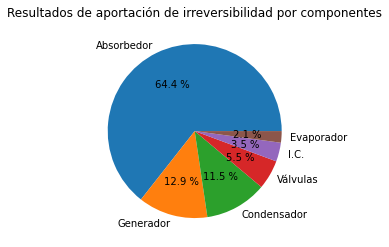

In [31]:
rowD= [Iab,Ige,Ico,Ival,Ihex,Ieva]
row_D = ['Absorbedor','Generador','Condensador','Válvulas','I.C.','Evaporador']
data4 = rowD
plt.pie(data4, labels = row_D,autopct="%0.1f %%") 
plt.title("Resultados de aportación de irreversibilidad por componentes")
plt.show()